# Communicate Data Findings from PISA 2012


## Preliminary Wrangling
This dataset shows the effort of the OECD giving reasonable test results to argue about academic performance of school children in dependency to many different factors. Everyone that has children knows this predicament. We want our kids to be very sucessful in their later lives but we don't want to leverage them to be more hardworking and disciplined as it could harm their emotional condition. The evaluation of this dataset could give the right advice to give our kids the right settings for beeing happy and sucessful in their schooldays and their whole life at all. I will pick up some of the factors and show several coherences between them.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [11]:
pisa_df = pd.read_csv("pisa2012.csv",encoding="latin-1")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
pisa_df.shape

(485490, 636)

In [23]:
pisa_df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [21]:
",".join(list(pisa_df))

'Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q

### What is the structure of your dataset?

The pisa dataset(485490, 636)This dataset is huge as it holds 485490 observations by using 636 different columns for several tests. It includes results from questionaires regarding:
  * home environment students
  * parental environment of students
  * condition of the school
  * the habits and practices of the teacher
  * test results from science-oriented tests<br/><br/>

Therefore it's crucial to cut only a few interesting columns from this dataset. I've used this [document](http://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf) to get a explanation for the     partly cryptic column names. It's one of the codebooks next to some others that are exclusively designed for the purpose to explain the different columns. In the upcoming part I will explore and choose   some columns that appears interesting to me:

In [331]:
pisa_result_df = pd.DataFrame()

### General data columns about the participated students

I will take three variables from the dataset that could be labelled as "general information" about the participant. Nevertheless these are very important variables that are often used in studies to draw several relationships:

#### Sex (Categorical)

In [332]:
pisa_result_df['sex'] = pisa_df['ST04Q01']
pisa_result_df['sex'].value_counts()

Female    245064
Male      240426
Name: sex, dtype: int64

#### Nationality (Categorical)

In [334]:
pisa_result_df['nationality'] = pisa_df['NC']
pisa_result_df['nationality'].value_counts()[:5]

Mexico     33806
Italy      31073
Spain      25313
Canada     21544
Brazil     19204
Name: nationality, dtype: int64

#### Wealth (Continuous)
The value of wealth was created by asking for 14 specific household items. Additionally every country added three items that represents wealth in their society.

In [335]:
pisa_result_df['wealth'] = pisa_df['WEALTH']
pisa_result_df['wealth'].head()

0   -2.92
1    0.69
2   -0.23
3   -1.17
4   -1.17
Name: wealth, dtype: float64

### Student Attributes

There aren't as many student habit specific variables in the dataset as I was hoping for. Two of them that sounds interesting for me are related to the strictness of daily school attendance:

#### Late for school (Categorical)

In [ ]:
pisa_result_df['late_for_school'] = pisa_df['ST08Q01']
pisa_result_df['late_for_school'].value_counts()

#### Skip whole school day (Categorical)

In [ ]:
pisa_result_df['skip_whole_day'] = pisa_df['ST09Q01']
pisa_result_df['skip_whole_day'].value_counts()

### Parent Attributes

Related to my introductory words I will explore different parent attributes to examine their influence on the students academic achievements.

#### Job of Mother (Categorial)

In [ ]:
pisa_result_df['mother_job'] = pisa_df['OCOD1']
pisa_result_df['mother_job'].value_counts()[:5]

#### Job of Father (Categorical)

In [ ]:
pisa_result_df['father_job'] = pisa_df['OCOD2']
pisa_result_df['father_job'].value_counts()[:5]

#### Father highest schooling (Categorical)

In [ ]:
pisa_result_df['father_schooling'] = pisa_df['ST17Q01']
pisa_result_df['father_schooling'].value_counts()

#### Mother highest schooling (Categorical)

In [ ]:
pisa_result_df['mother_schooling'] = pisa_df['ST13Q01']
pisa_result_df['mother_schooling'].value_counts()

### Teacher Practices (Frequency in lessons)
As the teacher practice questions are very homogeneously in terms of rating range and their level of importance compared to each other I will add them together to one single discrete value. This will represent a teacher with best practices with the possible maximum number of points and worst practices with the possible minimum of points. I will explain here the function I'm using to create these summarizing variables:

__HOW merge_categorical:__ 
   * use a __dict__ to match every possible categorical variable and assign a integer point number
   * utilizing a custom __filter__ to find all dataset columns that starts with "ST79Q" to find all questions that are related to teacher practices
   * creating a __subset__ of the dataset with these filtered questions
   * apply a __lambda__ function to get the sum over all questions of one participant
   * creating a __norm_value__ that holds the number of questions and applying this value as the divisor to the resulting sum for better comparison to other variables 

In [ ]:
def merge_categorical(df,col_str,rating_dict):
    
    filter_col = [col for col in df if col.startswith(col_str)]
    subset_df = df[filter_col].fillna(0)
    norm_value = len(filter_col)
    subset_df['sum'] = subset_df.apply(lambda x: (sum([rating_dict[y] for y in x[filter_col]]))/norm_value , axis=1)
    
    return subset_df

rating_dict_freq_lesson = {"Every Lesson":4,"Most Lessons":3,"Some Lessons":2,"Never or Hardly Ever":1,0:0}

teacher_practice = merge_categorical(pisa_df,"ST79Q",rating_dict_freq_lesson)

In [ ]:
pisa_result_df['teacher_practice'] = teacher_practice['sum']

### Math Interest and Motivation (Agree)

As the math interest and motivation questions are very homogeneously in terms of rating range and their level of importance compared to each other I will add them together to one single discrete value. This will represent a student with highest interest and motivation in mathematics with the possible maximum of points and a student with lowest interest and motivaion with the possible minimum of points. I will use __merge_categorical__ again with another dict. 

In [ ]:
rating_dict_agree = {"Strongly agree":4,"Agree":3,"Disagree":2,"Strongly disagree":1,0:0}

math_interest = merge_categorical(pisa_df,"ST29Q",rating_dict_agree)

In [ ]:
pisa_result_df['math_interest'] = math_interest['sum']

### Math Self-Efficacy (Confidence)

As the math efficacy questions are very homogeneously in terms of rating range and their level of importance compared to each other I will add them together to one single discrete value. This will represent a student with highest self-efficacy in mathematics with the possible maximum of points and a student with lowest self-efficacy with the possible minimum of points.  

In [ ]:
rating_dict_conf = {"Very confident":4,"Confident":3,"Not very confident":2,"Not at all confident":1,0:0}

math_self_efficacy = merge_categorical(pisa_df,"ST37Q",rating_dict_conf)

In [ ]:
pisa_result_df['math_self-efficacy'] = math_self_efficacy['sum']

### Familiarity with Math concepts (Knowledge)
As the math concepts questions are very homogeneously in terms of rating range and their level of importance compared to each other I will add them together to one single continuous value. This will represent a student with highest familiarity with math concepts with the possible maximum of points and a student with lowest familiarity with the possible minimum of points.  

In [ ]:
rating_dict_know = {0:0,
                    "Never heard of it":1, 
                    "Heard of it once or twice":2, 
                    "Heard of it a few times":3, 
                    "Heard of it often":4, 
                    "Know it well,  understand the concept":5}

math_familiarity = merge_categorical(pisa_df,"ST62Q",rating_dict_know)

In [ ]:
pisa_result_df['math_familiarity']  = math_familiarity['sum']

In [506]:
pisa_result_df.to_csv("pisa_result_df.csv")

After storing and reopening my new values I'm doing some cleaning to get more reasonable data in the visualisation. Due to my custom calculation there are many values on the left end of the distribution creating kind of a unappropriate tail. As there are several rows in the dataset where are only one or two questions are answered and the rest is __NaN__ the resulting points in summation are below the minimum of reachable points with all answered questions. I experimented with different methods to overcome this problem. It turns out that cutting this tail on a specific limit does the best job. Therefore it's a tradeoff where to cut the values in this tail as the resulting distribution is distorted by the __NaN__ values. From my point of view, __0.5__ marks a very good limit.

In [125]:
pisa_visual_df = pd.read_csv('pisa_result_df.csv')
pisa_visual_df = pisa_visual_df.drop(columns=['Unnamed: 0'])

pisa_visual_df['teacher_practice'] = pisa_visual_df[pisa_visual_df['teacher_practice'] > 0.5]['teacher_practice']
pisa_visual_df['math_interest'] = pisa_visual_df[pisa_visual_df['math_interest'] >= 0.5]['math_interest']
pisa_visual_df['math_familiarity'] = pisa_visual_df[pisa_visual_df['math_familiarity'] > 0.5]['math_familiarity']
pisa_visual_df['math_self-efficacy'] = pisa_visual_df[pisa_visual_df['math_self-efficacy'] > 0.5]['math_self-efficacy']

## Feature Selection
### Main Features

> Next to my custom variables I did choose the following to be my main features:
  * Teacher practices (measured by frequency in lessons)
  * Math interest and motivation (measured by agreement to several questions)
  * Math Self-Efficacy (measured by confidence dealing with several mathematical methods)
  * Familiarity with Math concepts (measured by knowledge over a certain math concept)
  * Wealth (continuous)
 
### Supporting Features

> There are other interesting features I want to experiment with to point out hopefully interesting relationships and correlations:
  * Job of mother
  * Job of father
  * Father highest schooling (categorical)
  * Mother highest schooling (categorical)
  * Gender
  * Nationality
  * Student late for school
  * Student skip whole school day


### Key Questions to answer

  * __Are there differences in math achievement based on gender, nationality, wealth or student attitudes?__
  * __Are there differences in math achievement based on teacher practices and attitudes?__
  * __Are there differences in math achievement based on parents education or parents job?__

## Univariate Exploration

The original dataset and its columns consists mainly of categorical values. That will make the search for outliers and unusual points obsolete. For the collection of features I've choosen, I can explore __Wealth__ and my four self created features __Teacher Practices__, __Math Interest and Motivation__, __Math Self-Efficacy__ and __Familiarity with Math concepts__ as they represent continuous values.

### Explore Wealth

In [4]:
pisa_visual_df['wealth'].head(10)


0   -2.92
1    0.69
2   -0.23
3   -1.17
4   -1.17
5   -0.95
6   -0.95
7   -1.46
8   -0.49
9   -1.82
Name: wealth, dtype: float64

We can see some very small distances between the values of __wealth__. Therefore we need to rearrange the bins to have a proper insight into the distribution of the values. Moreover there are multiple __NaN__ values in the __wealth__ column. I will remove this rows temporary for not deleting datasets before inspecting them in-depth.

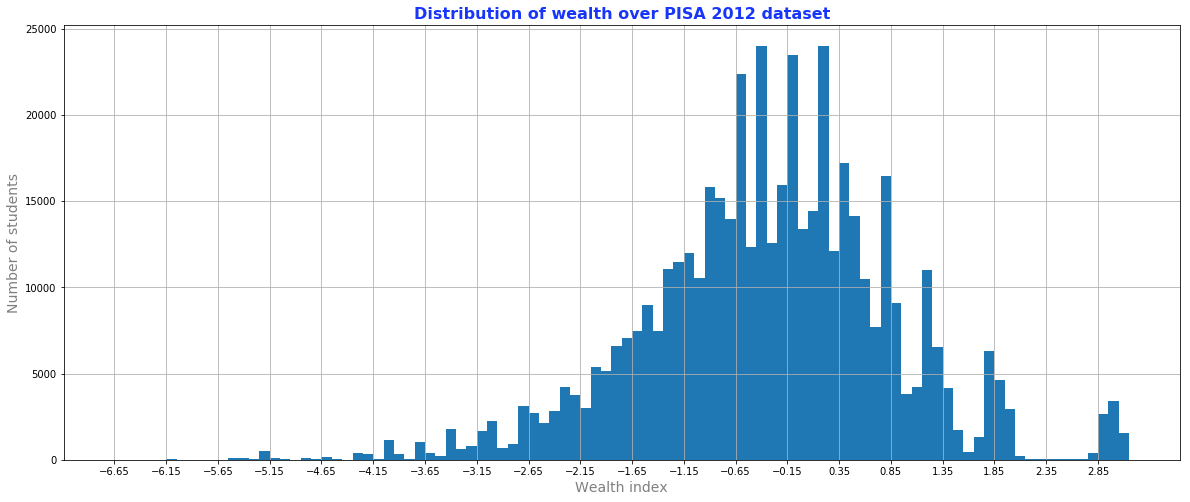

In [126]:
fig = plt.figure(figsize=[20,8])

wealth_proc = pisa_visual_df[np.isfinite(pisa_visual_df['wealth'])]['wealth']
bins = np.arange(wealth_proc.min(),wealth_proc.max(),0.1)
wealth_proc.hist(bins=bins)
plt.xticks(np.arange(wealth_proc.min(), wealth_proc.max(), 0.5));
plt.xlabel('Wealth index', color="grey", fontsize=14);
plt.ylabel('Number of students', color="grey", fontsize=14);
plt.title('Distribution of wealth over PISA 2012 dataset', color="#1736fa",fontsize=16, fontweight='bold');



In [114]:
pisa_visual_df[pisa_visual_df['wealth'] > 2.85]['nationality'].value_counts()[:5]

Qatar                        1732
United Arab Emirates         1125
Canada                        992
United States of America      477
Italy                         333
Name: nationality, dtype: int64

### Explore Teacher practices

As I did a custom calculation to merge multiple categorical answers I had a minimum possible amount of points. Like I mentioned before, I tried to change this minimum to zero by substracting this minimum from the resulting sum of points. As many related questions were answered with __NaN__ there are multiple cases where sums over all questions will be zero. I will cut them out as they will distort the distribution. I experimented to create a symmetric representation of the categorical variables, which means positive Variables represents positive points and negative variables represents negative points. This will result with the __NaN__ values at the center of the distribution and will overlap maybe some valid values. Therefore I've choosen a positive only categorical representation

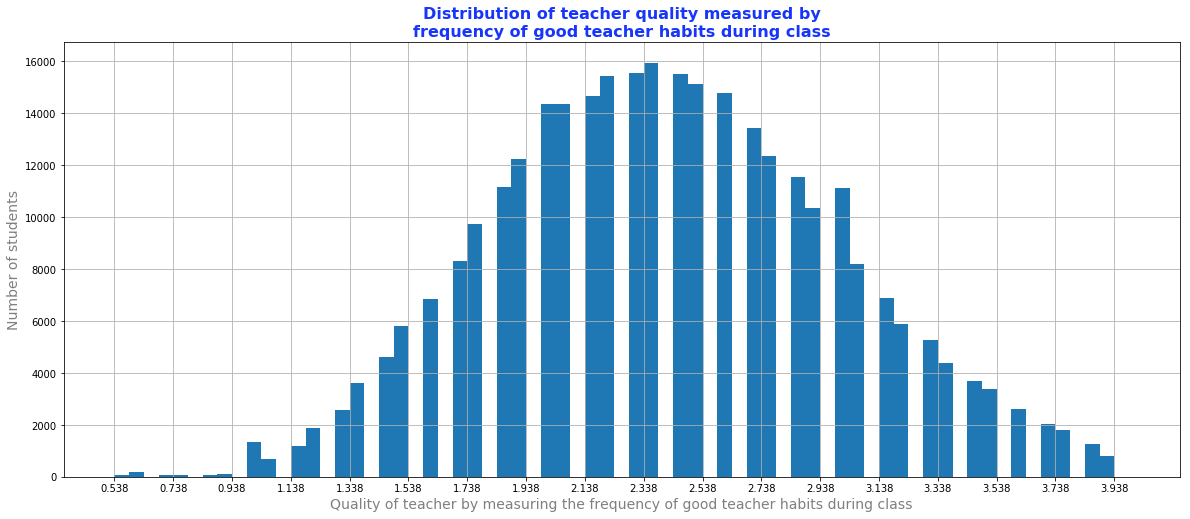

In [127]:
fig = plt.figure(figsize=[20,8])

bins = np.arange(pisa_visual_df['teacher_practice'].min(),pisa_visual_df['teacher_practice'].max(),0.05)
pisa_visual_df['teacher_practice'].hist(bins=bins);
plt.xticks(np.arange(pisa_visual_df['teacher_practice'].min(),pisa_visual_df['teacher_practice'].max(),0.2));
plt.ylabel('Number of students', color="grey", fontsize=14);
plt.xlabel('Quality of teacher by measuring the frequency of good teacher habits during class', color="grey", fontsize=14);
plt.title('Distribution of teacher quality measured by\nfrequency of good teacher habits during class', color="#1736fa",fontsize=16, fontweight='bold');

### Explore Math Interest

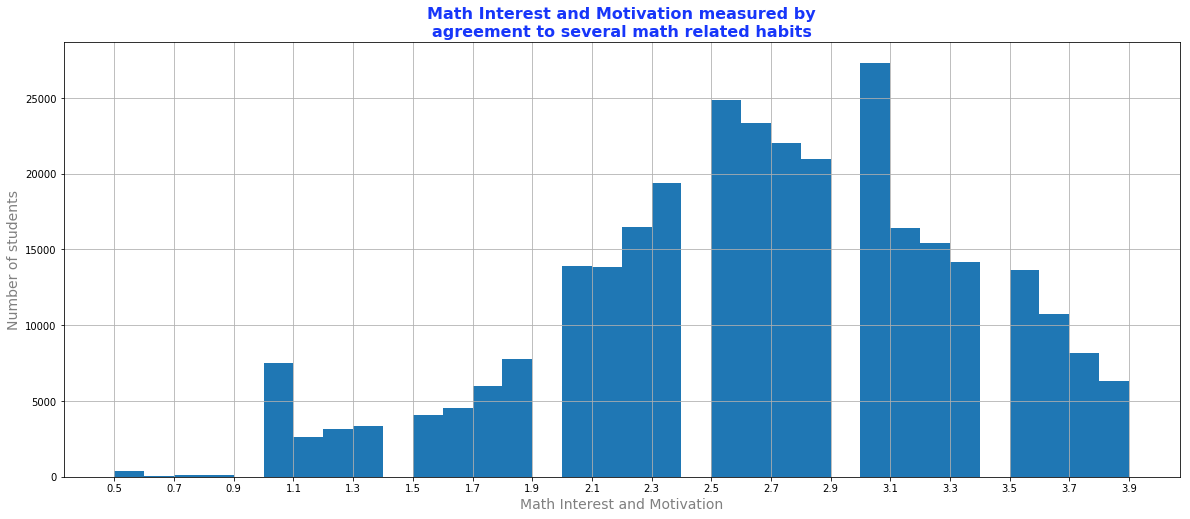

In [129]:
fig = plt.figure(figsize=[20,8])

bins = np.arange(pisa_visual_df['math_interest'].min(),pisa_visual_df['math_interest'].max(),0.1)
pisa_visual_df['math_interest'].hist(bins=bins);
plt.xticks(np.arange(pisa_visual_df['math_interest'].min(),pisa_visual_df['math_interest'].max(),0.2));
plt.ylabel('Number of students', color="grey", fontsize=14);
plt.xlabel('Math Interest and Motivation', color="grey", fontsize=14);
plt.title('Math Interest and Motivation measured by\nagreement to several math related habits', color="#1736fa",fontsize=16, fontweight='bold');


### Explore Math Self-Efficacy

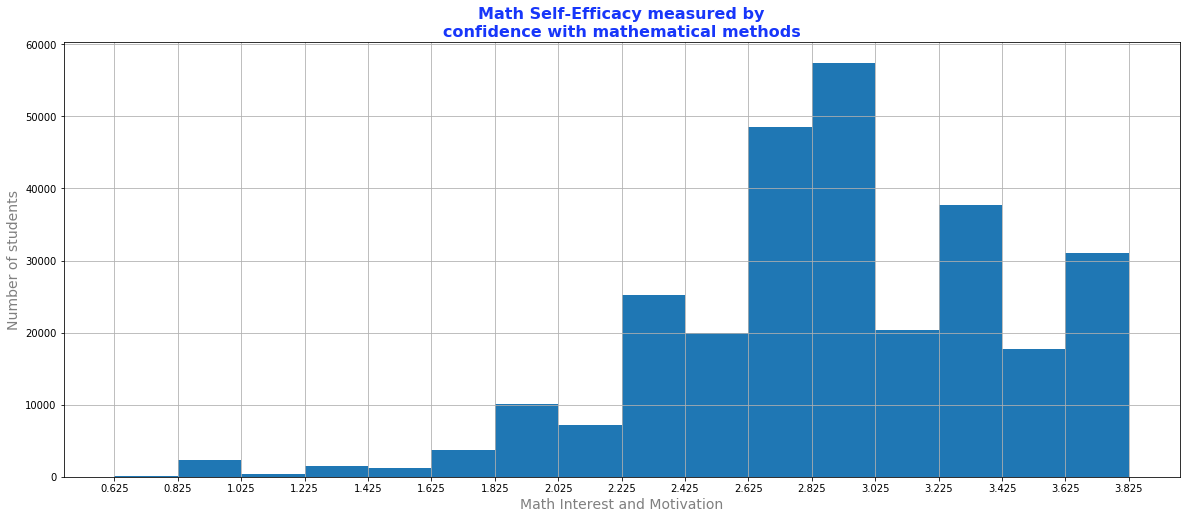

In [130]:
fig = plt.figure(figsize=[20,8])


bins = np.arange(pisa_visual_df['math_self-efficacy'].min(),pisa_visual_df['math_self-efficacy'].max(),0.2)
pisa_visual_df['math_self-efficacy'].hist(bins=bins);
plt.xticks(np.arange(pisa_visual_df['math_self-efficacy'].min(),pisa_visual_df['math_self-efficacy'].max(),0.2));
plt.ylabel('Number of students', color="grey", fontsize=14);
plt.xlabel('Math Interest and Motivation', color="grey", fontsize=14);
plt.title('Math Self-Efficacy measured by\nconfidence with mathematical methods', color="#1736fa",fontsize=16, fontweight='bold');

### Explore Math familiarity

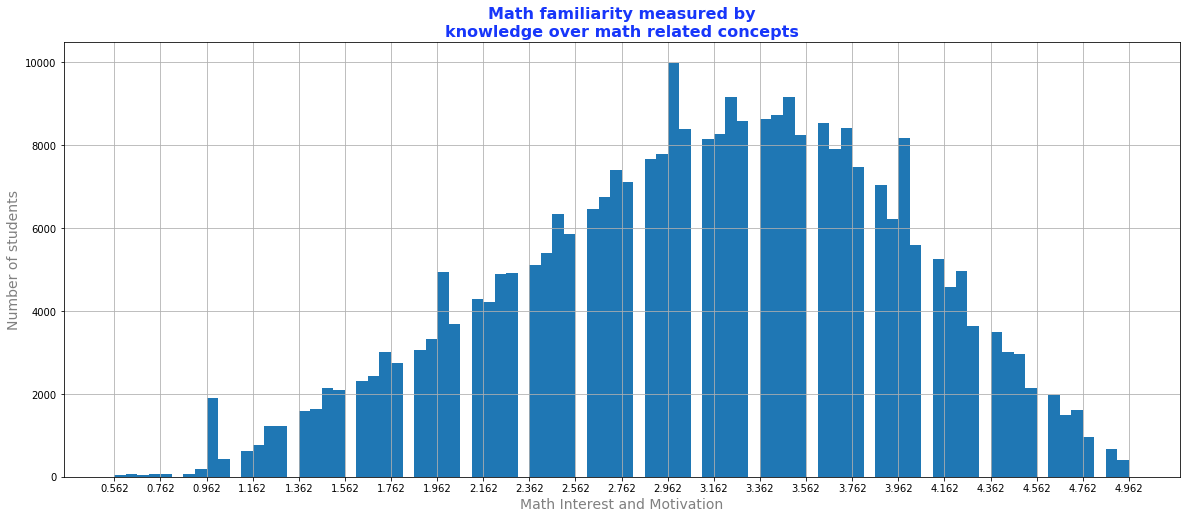

In [131]:
fig = plt.figure(figsize=[20,8])


bins = np.arange(pisa_visual_df['math_familiarity'].min(),pisa_visual_df['math_familiarity'].max(),0.05)
pisa_visual_df['math_familiarity'].hist(bins=bins);
plt.xticks(np.arange(pisa_visual_df['math_familiarity'].min(),pisa_visual_df['math_familiarity'].max(),0.2));
plt.ylabel('Number of students', color="grey", fontsize=14);
plt.xlabel('Math Interest and Motivation', color="grey", fontsize=14);
plt.title('Math familiarity measured by\nknowledge over math related concepts', color="#1736fa",fontsize=16, fontweight='bold');

### Results of Univariate Exploration

#### Wealth

> The distribution is __left-skewed__ and shows some noticeable outliers on the right top of the distribution. After examining the datasets that are in this area it isn't really unusual anymore as it represents the non equally distribution of wealth in our global society. I had to remove some __NaN__ values and did rearrange the bins of the x-axis for having much more levels in my histogram as the values in the wealth column are closely spaced.

#### Teacher Practices

> It's funny, we can explore the categorical origin of the data such easily. By decreasing the binsize empty gaps will occur. This is due to the categorical source while the values are looking like continuous values they are categorical levels, too, resulting from the number of questions and amount of categorical variables. Nevertheless, the result seems promising for me, as it shows a likely normal distribution.

#### Math Interest and motivation

> The visualisation looks roughly like a normal distribution apart from the low tail on the left side. This tail results from my custom calculation handling the __NaN__ values as I explained before.

#### Math Self-Efficacy with mathematical methods

> There is much less variation in the histogram for this values. Trying to decrease the binsize will result in empty gaps. As the source of this data has much fewer categorical questions to sum up there are less different bins even when decreasing binsizes. The distribution is __left-skewed__. From this fact I can assume, that the Math Self-Efficacy of the participated students is high in general.

#### Familiarity wit Math concepts

> Next to empty gaps for decreasing bins there is another interesting behaviour exclusive to its categorical source. There are some bins that distorting the distribution as they are much higher than their neighbors and it occurs that they are reflected on the center of the distribution. I can explain that, as some patterns in answering categorical questions will be more likely to be choosen independent from the real circumstances. Moreover the distribution is slightly __left-skewed__. From this fact I can assume, that the Familiarity of the participated students is high in general.

## Bivariate Exploration

Now I will investigate pairs of values by creating 2-dimensional plots. At first I will plot the relation between the quantitive variables I declared as my main features. I will use heatmaps, violinplots and Grid Plots of histograms over several categories to show the relationships. Scatterplots aren't appropriate in this case, as there are to many points, which will lead to one single blob of points. 

### Heatmaps for Continuous to Continuous Visualisation

This first bivariate plot should be used to examine the relationships between my selected main features. Therefore I will be creating custom bin ranges for x-axis and y-axis to clearly point out areas with strong accumulation. I'm examining :

  * Wealth and Math Familiarity
    * Is the wealth of a family related to the students mathematical capabilities?
  * Math Interest and Math Familiarity
    * Has an math interested and math motivated student better mathematical achievements? 
  * Familiarity with Math and Math Self-Efficacy
    * Is Familiarity with Math (Knowledge) and Math Self-Efficacy (Confidence) connected?
  * Teacher Practices and Math Familiarity
    * Does teacher practices in general influence the students mathematical achievements?

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


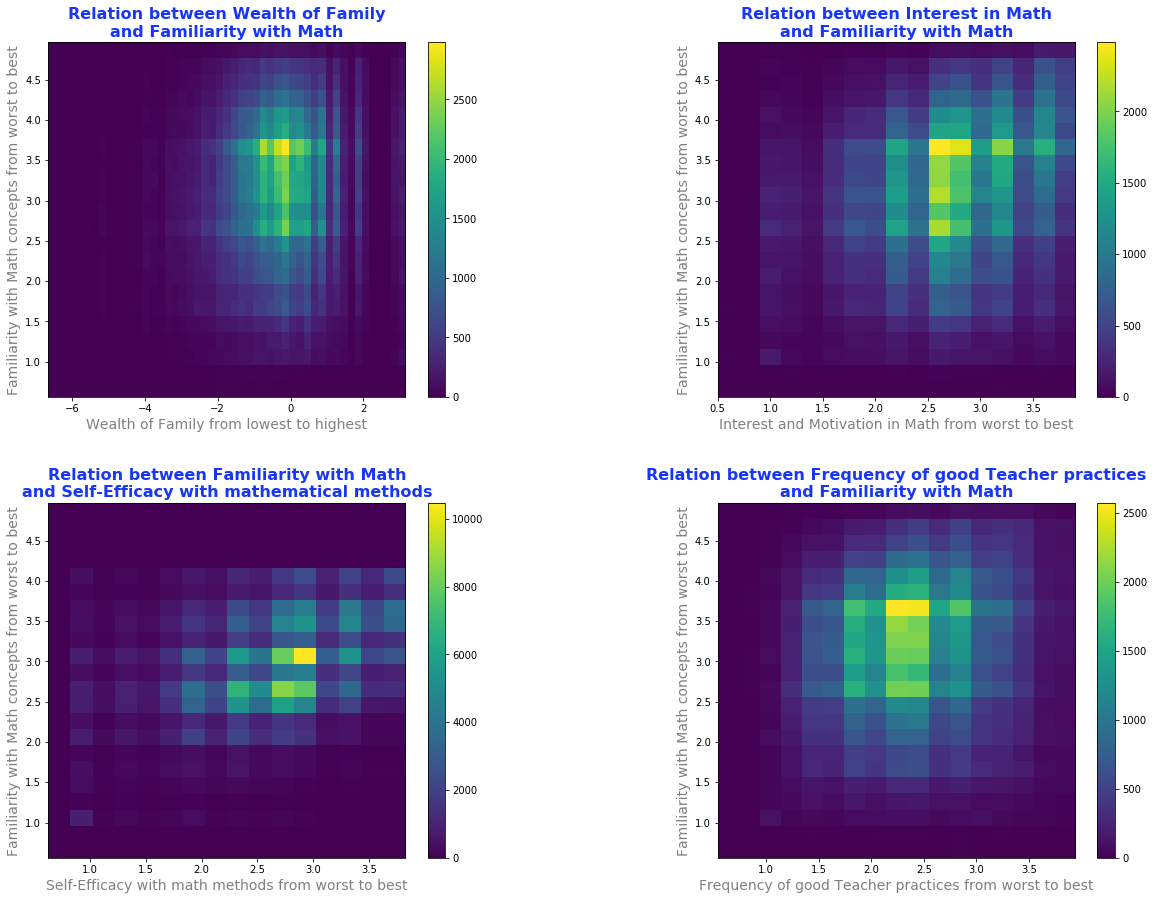

In [132]:
plt.figure(figsize = [20, 15])
plt.subplots_adjust(wspace=0.5,hspace=0.3)
# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(2, 2, 1)
bins_x = np.arange(pisa_visual_df['wealth'].min(),pisa_visual_df['wealth'].max(),0.2)
bins_y = np.arange(pisa_visual_df['math_familiarity'].min(),pisa_visual_df['math_familiarity'].max(),0.2)
plt.hist2d(data = pisa_visual_df, x = 'wealth', y = 'math_familiarity',
           bins = [bins_x, bins_y])
plt.title("Relation between Wealth of Family\nand Familiarity with Math", color="#1736fa",fontsize=16, fontweight='bold')
plt.xlabel("Wealth of Family from lowest to highest", color="grey", fontsize=14)
plt.ylabel("Familiarity with Math concepts from worst to best", color="grey", fontsize=14)
plt.colorbar();

# right plot: heat map with bin edges between values
plt.subplot(2, 2, 2)
bins_x = np.arange(pisa_visual_df['math_interest'].min(),pisa_visual_df['math_interest'].max(),0.2)
bins_y = np.arange(pisa_visual_df['math_familiarity'].min(),pisa_visual_df['math_familiarity'].max(),0.2)
plt.hist2d(data = pisa_visual_df, x = 'math_interest', y = 'math_familiarity',
           bins = [bins_x, bins_y])
plt.title("Relation between Interest in Math\nand Familiarity with Math", color="#1736fa",fontsize=16, fontweight='bold')
plt.xlabel("Interest and Motivation in Math from worst to best", color="grey", fontsize=14)
plt.ylabel("Familiarity with Math concepts from worst to best", color="grey", fontsize=14)
plt.colorbar();


plt.subplot(2, 2, 3)
bins_x = np.arange(pisa_visual_df['math_self-efficacy'].min(),pisa_visual_df['math_self-efficacy'].max(),0.2)
bins_y = np.arange(pisa_visual_df['math_familiarity'].min(),pisa_visual_df['math_familiarity'].max(),0.2)
plt.hist2d(data = pisa_visual_df, x = 'math_interest', y = 'math_self-efficacy',
           bins = [bins_x, bins_y])
plt.title("Relation between Familiarity with Math\nand Self-Efficacy with mathematical methods", color="#1736fa",fontsize=16, fontweight='bold')
plt.ylabel("Familiarity with Math concepts from worst to best", color="grey", fontsize=14)
plt.xlabel("Self-Efficacy with math methods from worst to best", color="grey", fontsize=14)
plt.colorbar();


plt.subplot(2, 2, 4)
bins_x = np.arange(pisa_visual_df['teacher_practice'].min(),pisa_visual_df['teacher_practice'].max(),0.2)
bins_y = np.arange(pisa_visual_df['math_familiarity'].min(),pisa_visual_df['math_familiarity'].max(),0.2)
plt.hist2d(data = pisa_visual_df, x = 'teacher_practice', y = 'math_familiarity',
           bins = [bins_x, bins_y])
plt.title("Relation between Frequency of good Teacher practices\nand Familiarity with Math", color="#1736fa",fontsize=16, fontweight='bold')
plt.xlabel("Frequency of good Teacher practices from worst to best", color="grey", fontsize=14)
plt.ylabel("Familiarity with Math concepts from worst to best", color="grey", fontsize=14)
plt.colorbar();

### Correlation Map for Continuous to Continuous Visualisation

To emphasize my first impression about the previously visualised variables I will output the correlation matrix using a heatmap:

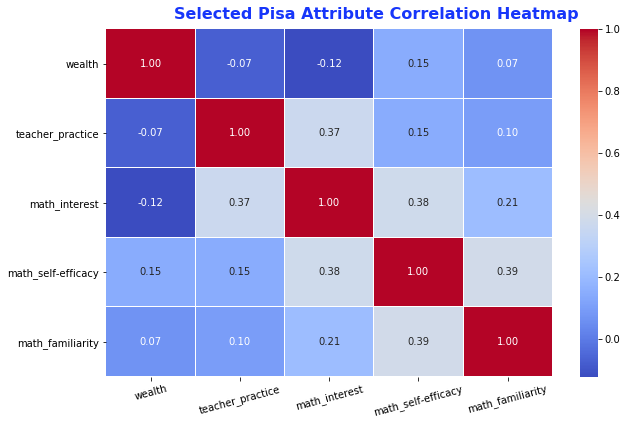

In [134]:

f, ax = plt.subplots(figsize=(10, 6))
corr = pisa_visual_df.corr()
hm = sb.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
plt.xticks(rotation=15)
t= f.suptitle('Selected Pisa Attribute Correlation Heatmap', color="#1736fa",fontsize=16, fontweight='bold')

### Violinplots for Continuous to Categorical Visualisation

For a better comparhison between neighbored violinplots I'm reordering the dataset for having the desired categorical variable in a logical order:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


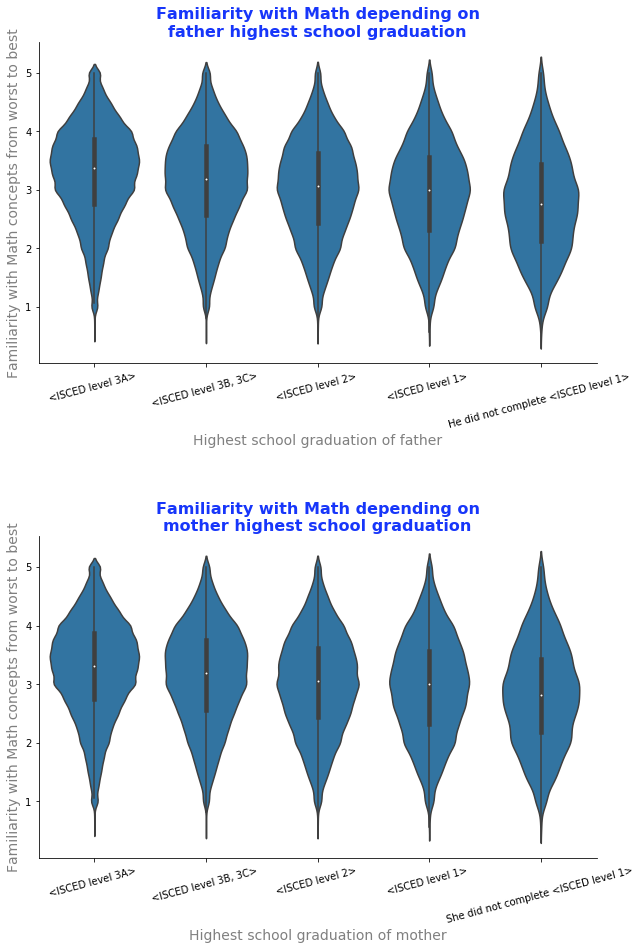

In [135]:
pisa_violin_df = pisa_visual_df.copy()

plt.figure(figsize = [10, 15])
plt.subplots_adjust(hspace=0.54)


ax = plt.subplot(2, 1, 1)
base_color = sb.color_palette()[0]

father_school_classes = ['<ISCED level 3A> ','<ISCED level 3B, 3C> ','<ISCED level 2> ','<ISCED level 1> ','He did not complete <ISCED level 1> ']
pisa_violin_df['father_schooling'] = pisa_visual_df['father_schooling'].astype('category', ordered = True,
                                                         categories = father_school_classes);

sb.violinplot(data = pisa_violin_df, x = 'father_schooling', y = 'math_familiarity', color = base_color)
plt.xticks(rotation=15)
plt.title("Familiarity with Math depending on\nfather highest school graduation", color="#1736fa",fontsize=16, fontweight='bold')
plt.xlabel("Highest school graduation of father", color="grey", fontsize=14)
plt.ylabel("Familiarity with Math concepts from worst to best", color="grey", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

mother_school_classes = ['<ISCED level 3A> ','<ISCED level 3B, 3C> ','<ISCED level 2> ','<ISCED level 1> ','She did not complete <ISCED level 1> ']
pisa_violin_df['mother_schooling'] = pisa_visual_df['mother_schooling'].astype('category', ordered = True,
                                                         categories = mother_school_classes)

ax = plt.subplot(2, 1, 2)
sb.violinplot(data = pisa_violin_df, x = 'mother_schooling', y = 'math_familiarity', color = base_color);
plt.xticks(rotation=15);
plt.title("Familiarity with Math depending on\nmother highest school graduation", color="#1736fa",fontsize=16, fontweight='bold');
plt.xlabel("Highest school graduation of mother", color="grey", fontsize=14)
plt.ylabel("Familiarity with Math concepts from worst to best", color="grey", fontsize=14);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Heatmap for Continuous to Categorical Visualisation

I found this [Applying Heatmaps to categorical data](https://www.kaggle.com/tsilveira/applying-heatmaps-for-categorical-data-analysis) to create awesome heatmaps for big ranges of categorical values. I modified it for my needs to see the mathematical achievements over all participated countries. I want to find out, if specific countries have better achievements in math than others.

__HOW:__
  
  * regrouping the dataset by nationality and will take only the data for __Math Familiarity__ for new order
  * handling __NaN__ values
  * normalizing each row, for having the same relative count for each country
  * removing some additional data points from the __Math Familiarity__ as they contain only a very few students and they disturb the overall impression for the desired heatmap

In [102]:
def df_row_normalize(dataframe):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each line.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    return dataframe.div(dataframe.sum(axis=1), axis=0)

pisa_nationality = pisa_visual_df.groupby(by=['nationality'])['math_familiarity'].value_counts().sort_index()
pisa_nationality = pisa_nationality.unstack(1)
pisa_nationality.fillna(value=0, inplace=True)
pisa_nationality = df_row_normalize(pisa_nationality)
pisa_nationality = (pisa_nationality*100).astype('int64')
pisa_nationality.drop(columns=[0.625,0.75,0.875,1.0,1.125,1.25,1.375,1.5,1.625],inplace=True)

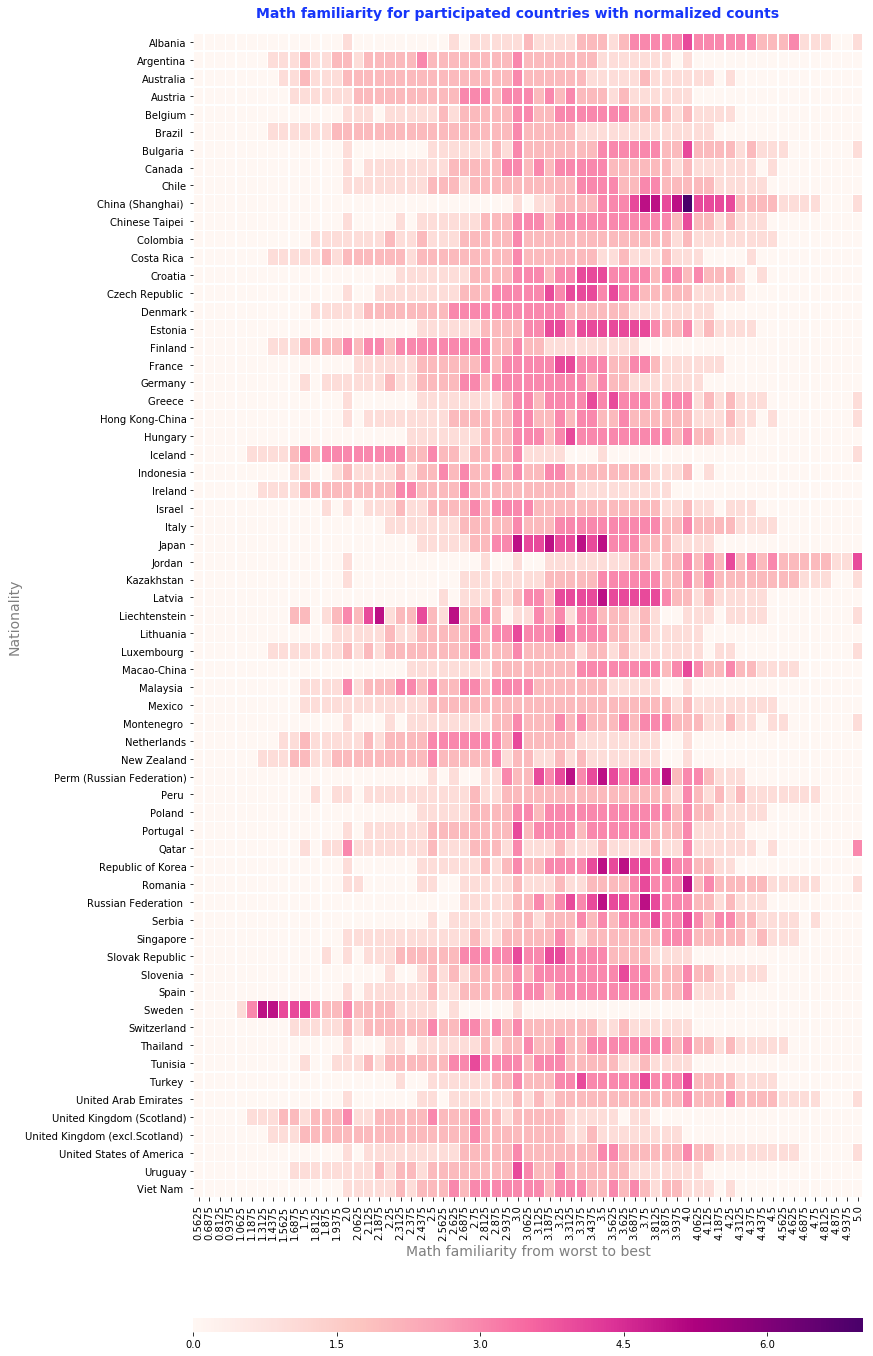

In [136]:
fig3, ax = plt.subplots(figsize=(12, 25))
fig3.subplots_adjust(top=.965)
plt.suptitle('Math familiarity for participated countries with normalized counts', color="#1736fa",fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.08, 'aspect':50}
sb.heatmap(pisa_nationality, annot=False, fmt='d', linewidths=.3, ax=ax, cmap='RdPu', cbar_kws=cbar_kws);
plt.xlabel("Math familiarity from worst to best", color="grey", fontsize=14)
plt.ylabel("Nationality", color="grey", fontsize=14);


### Results of Bivariate Exploration
#### Heatmaps and Correlation Maps for Continuous to Continuous Visualisation
The heatmaps are giving reason for some relationships and the correlation map confirms them: 
  * __Math Self-Efficacy__ is positively related to __Math Familiarity__
    * both represents math achievements, therefore they should be related
  * __Teacher Practice__ is positively related with __Math Interest__ but hardly related with __Math Self-Efficacy__ and __Math Familiarity__
    * it's interesting that good Teacher Practice influences only the Interest and Motivation for Math but not the Achievements in Maths
  * __Math Interest__ has a stronger relation to __Math Self-Efficacy__ than to __Math Familiarity__
  
As __Math Familiarity__ shows the highest variation and most normal distribution I will prefer this variable for further analysis to represent mathematical achievement. 
 
#### Violinplots for Continuous to Categorical Visualisation
Both Violinplots are seeming to be nearly identical. I would conclude it doesn't matter whether father or mother have a higher education. I guess often both parents have the same level of education, moreover:
  * the tail towards __worst Math Familiarity__ for parents without any educational graduation (not completing ISCED Level 1) is wider than for the other categories
    * students of parents without any graduation are more prone to negative mathematical achievements
  * the tail towards __best Math Familiarity__ for parents with the highest educational graduation (ISCED Level 3A) is wider than for the other categories
    * students of parents with highest graduation are more prone to positive mathematical achievements
  * the body of the plot for parents with the highest educational graduation is wider than for the other categories
    * in general is this plot more sharpened with tight tails and a wider body in the top third of __Math Familiarity__
    * this shows a higher rate of positive math achievement for students with higher educated parents

#### Heatmap for Continuous to Categorical Visualisation
The previous plots did show some interesting relationships but not very strong ones. However, this plot shows very significant results towards the relationship between the __Nationality__ and the __Math Familiarity__:

  * The accumulation of __bad Math Familiarity__ is really high for Sweden
    * according to [OECD Pisa 2012 Results ](https://www.oecd.org/pisa/keyfindings/pisa-2012-results-overview.pdf) this result is similiar to my findings
    * I'm assuming swedish students did perform really bad in mathematical tests
  * The accumulation of __very good Math Familiarity__ is really high for China
    * according to the document, mentioned before China is the "Superstar" of the Pisa 2012 Studies
    * I'm assuming chinese students did perform really well in mathematical tests



## Multivariate Exploration

After I did examine the relation between mathematical achievement and the education of the parents and got not a really strong correlation I will use multivariate exploration to take the other supporting features into account and proof the parental influence and the influence of students coming late to school on mathematical achievement:

### Grid Plot for Continuous to Categorical Visualisation with many categories and multiple hue

I will visualise the distribution of male and female students over __Math Familiarity__ for several different jobs of the students father. Before doing so, I'm assuming a left-skewed distribution should represent a high Math Familiarity and a right-skewed distribution a low Math Familiarity. I hope to find out, if specific jobs, will influence math achievements of the student. Therefore I will filter only a few jobs as there are over 500 different job values in this category variable:

__HOW:__

  * count the occurence for every job in the dataset
  * convert to a list of tuples and keep only jobs where count is higher than 4000
  * dismiss first two elements and 'Do not know' as they doesn't contain specific job
  * remove last element as it overflows the grid view

In [144]:
pisa_visual_df['father_job'].nunique()

588

In [151]:
pisa_grid_df = pisa_visual_df.copy()

fjobs_over_4000 = [x for x,y in list(pisa_visual_df['father_job'].value_counts().iteritems()) if y > 4000][2:]
fjobs_over_4000.remove('Do not know')
fjobs_over_4000.pop();

pisa_grid_df['father_job'] = pisa_visual_df['father_job'].astype('category', ordered = True,
                                                         categories = fjobs_over_4000);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


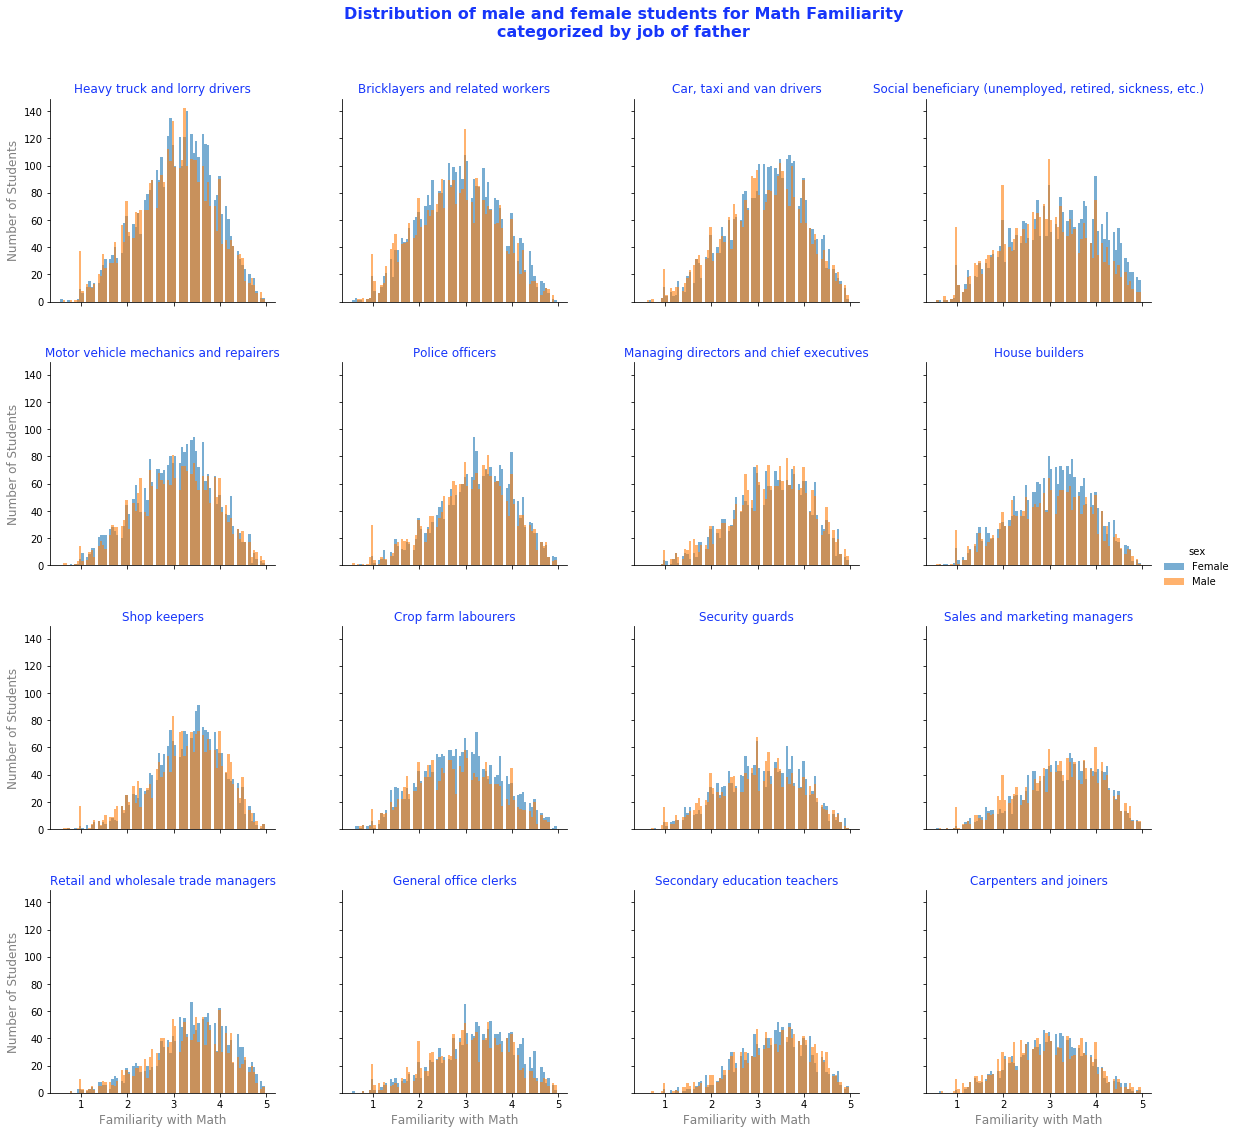

In [152]:
bins = np.arange(pisa_grid_df['math_familiarity'].min(),pisa_grid_df['math_familiarity'].max(),0.05)

g = sb.FacetGrid(data = pisa_grid_df, col = 'father_job',hue='sex', col_wrap = 4, height = 4,legend_out=True)
g.fig.subplots_adjust(wspace=0.3,hspace=0.3,top=.9)

g.map(plt.hist, 'math_familiarity',bins=bins, edgecolor='None', alpha = 0.6).add_legend()

g.set_titles('{col_name}',size=12,color="#1736fa")
g.set_ylabels('Number of Students', color="grey", fontsize=12)
g.set_xlabels('Familiarity with Math', color="grey", fontsize=12);
g.fig.subplots_adjust(wspace=0.3,hspace=0.3,top=.9)
plt.suptitle('Distribution of male and female students for Math Familiarity\ncategorized by job of father', color="#1736fa",fontsize=16, fontweight='bold');

### Scatterplot with Color encoding

As the previous visualisation doesn't show as significant results as I was hoping for, I will give the mothers job a try with a different data preparation for the plot and the additional variable __Wealth__ instead of seperating male and female students. As I want to create a scatterplot I have to be aware not plotting to many points into a scatterplot as it would create a big color blob. As I'm having a huge dataset, I did the following:

__HOW:__

  * count the occurence for every job in the dataset
  * convert to a list of tuples a keep job only if it has a count lower than 600
  * dismiss first two elements as they doesn't contain specific job titles
  * choose four specific jobs from the Top 20 of results that appears to have very different amounts of how often to deal with mathematical issues
  
Additionally I will plot the data with high transparency and relatively big points to notice accumulations of points more easily: 

In [139]:
pisa_grid_df = pisa_visual_df.copy()

final_job_categories = []
mjobs_under_600 = [x for x,y in list(pisa_visual_df['mother_job'].value_counts().iteritems()) if y < 600][2:]
for job in mjobs_under_600:
    if job.startswith("Financial and investment advisers"):
        final_job_categories.append(job)
    if job.startswith("Government tax and excise officials"):
        final_job_categories.append(job)
    if job.startswith("Tree and shrub crop growers"):
        final_job_categories.append(job)
    if job.startswith("Hairdressers, beauticians and related workers"):
        final_job_categories.append(job)
    

pisa_grid_df['mother_job'] = pisa_visual_df['mother_job'].astype('category', ordered = True,
                                                         categories = final_job_categories);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


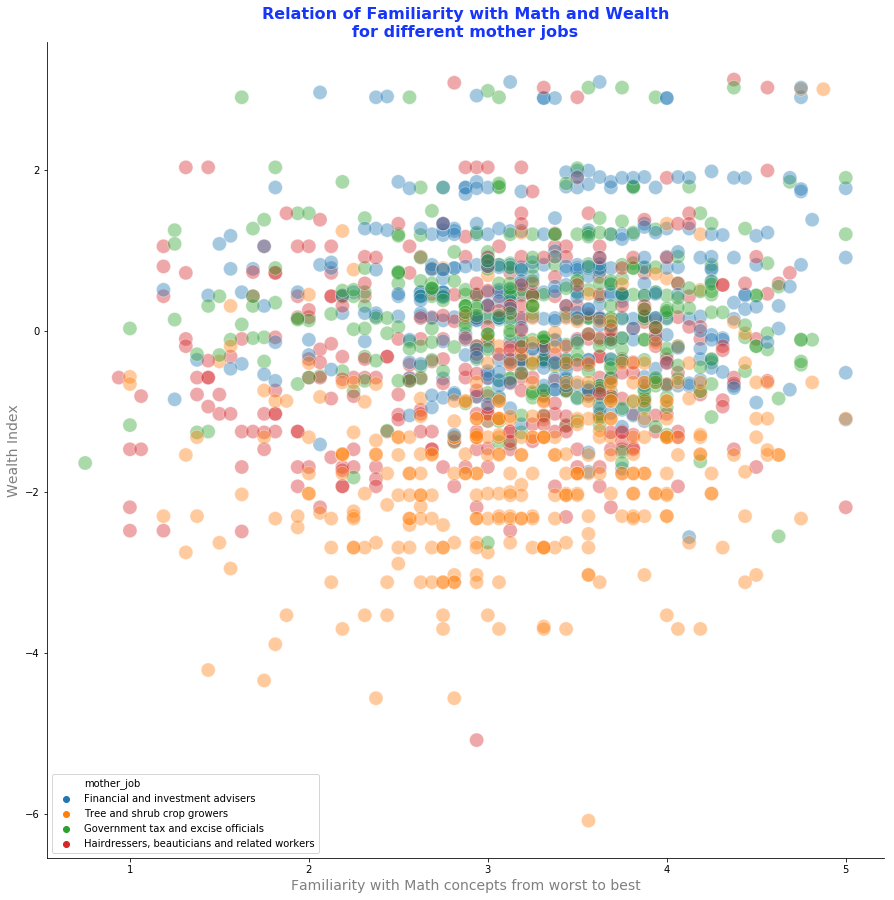

In [140]:
plt.figure(figsize=[15,15])
sb.scatterplot(data=pisa_grid_df,x="math_familiarity",y="wealth",hue="mother_job", alpha=.4, s=200);
plt.title("Relation of Familiarity with Math and Wealth\nfor different mother jobs", color="#1736fa",fontsize=16, fontweight='bold');
plt.ylabel("Wealth Index", color="grey", fontsize=14)
plt.xlabel("Familiarity with Math concepts from worst to best", color="grey", fontsize=14);
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Violinplot with split for multiple categories

Now I will visualise the influence for male and female students on the __Math Familiarity__ for the frequency of coming late to school and not coming to school at all:

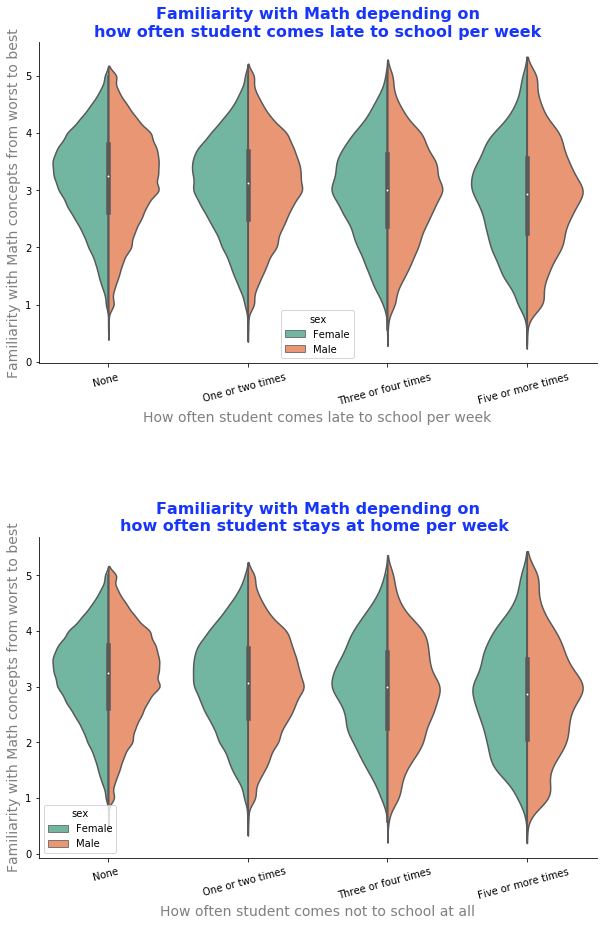

In [145]:
plt.figure(figsize = [10, 15])
plt.subplots_adjust(hspace=0.54)

ax = plt.subplot(2, 1, 1)
base_color = sb.color_palette()[0]

sb.violinplot(data = pisa_visual_df, x ='late_for_school', y = 'math_familiarity',hue='sex', palette='Set2',split=True)
plt.xticks(rotation=15)
plt.title("Familiarity with Math depending on\nhow often student comes late to school per week", color="#1736fa",fontsize=16, fontweight='bold')
plt.xlabel("How often student comes late to school per week", color="grey", fontsize=14)
plt.ylabel("Familiarity with Math concepts from worst to best", color="grey", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



ax = plt.subplot(2, 1, 2)
sb.violinplot(data = pisa_visual_df, x = 'skip_whole_day', y = 'math_familiarity', hue='sex',palette='Set2', split=True);
plt.xticks(rotation=15);
plt.title("Familiarity with Math depending on\nhow often student stays at home per week ", color="#1736fa",fontsize=16, fontweight='bold');
plt.xlabel("How often student comes not to school at all", color="grey", fontsize=14)
plt.ylabel("Familiarity with Math concepts from worst to best", color="grey", fontsize=14);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Results of Multivariate Exploration
#### Grid Plot for Continuous to Categorical Visualisation with many categories and multiple hue
We can see a __left-skewing__ for some categorical values:
  * "Sales and Marketing Managers" for male and female students
  * "Secondary education teachers" for male and female students
  * "Retail and Wholesale trade managers" for male and female students
  * "Managing Director and Chief Executives" for male and female students
This means, students with fathers in these jobs are prone to have better mathematical achievements. Moreover, these job titles appears to deal more often with mathematical issues than others. There are some other skewed distributions but these are the most significant.

Another result is, that the distributions for male and female students are similiar in the most cases. Only for "Social beneficiary" it's noticeable that more female students have good __Math Familiarity__ than male students.

#### Scatterplot with Color encoding

The distributions for students with mothers as "Financial and Investment Advisers" and "Government Tax and Excise officials" are similiar. Nearly all of the associated datapoints are in the top half for __Wealth Index__. It doesn't surprise me, a family with a job as "Financial and Invest Adviser" has a better wealth standard than a "Tree and shrub crop grower".

The student of the "Financial and Invest Adviser" has the biggest amount of points in the top third of __Math Familiarity__ next to "Government Tax and Excise officials". That means a student with a mother in one of these jobs are more prone to have good __Math Familiarity__ than the other two jobs.

Students of "Hairdressers, beauticians and related workers" and "Tree and shrub crop growers" are normal distributed over the whole plot.


#### Violinplot with split for multiple categories

The results of the violinplots doesn't show any significant relationships at all. It's interesting that the distributions for both variables "Late for school" and "Skip whole day" are nearly identical.


## Final Results

### Are there differences in math achievement based on gender, nationality, wealth or student attitudes?

I was able to point out a very strong relationship between the nationality and the math achievements. There are some countries, whom students did perform significantly bad like Sweden and others like China that did perform very good. I didn't create a gender and math achievement exclusive plot but as this variable is included in my Multivariate plots multiple times, I assume there is nearly no difference between boys and girls for math achievements. The plot for Wealth compared to Math familiarity and the associated correlation doesn't show any correlation. For measuring the student attitudes I did only extract their commitment towards visiting school by their frequency of coming late or skipping whole school days. Obviously the distribution for students that are missing classes more often is slightly higher for the areas with bad Math Familiarity but that isn't really significant.

### Are there differences in math achievement based on teacher practices and attitudes?

Teacher practices did only affect the Interest and the Motivation for math but not the achievement represented by Math Self-Efficacy and Math Familiarity at all.

### Are there differences in math achievement based on parents education or parents job?

The dependency of the highest schooling graduation shows a small relationship to Math Achievement e.g. Math Familiarity. Especially the highest gradiuation shows distributions with higher amounts of good Math Familiarity and the lowest graduation bigger amounts of students in the lowest areas of Math Familiarity. The dependency of the parents job to Math Familiarity shows a stronger relationship. If the mother or the father have a job that are related to mathematical issues, there is a higher amount of students that have better Math Achievements.   